# Student Performance Factors

# Introduction

The project aims to build a machine learning model to predict students’ exam performance based on various influencing factors such as study habits, socioeconomic conditions, parental education, and lifestyle. Predicting exam scores can help identify at-risk students early and guide interventions to improve academic outcomes. This aligns with the growing use of AI in educational analytics to personalize learning and enhance performance prediction.

# Problem Statement

Academic performance is influenced by multiple interdependent factors — social, economic, behavioral, and environmental. Traditional assessment methods fail to account for these multidimensional influences.
Problem: Develop a machine learning model that accurately predicts a student's Exam_Score using input variables from the dataset.
The goal is to:

Understand which factors most affect performance.

Build a predictive model using modern regression algorithms.

Evaluate model performance using metrics such as MAE, MSE, and R².

# Import required libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load dataset

In [20]:
df = pd.read_csv(r"E:\Data_Science\Project\ML_project5\StudentPerformanceFactors.csv")

# Inspecting the data

In [21]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [22]:
df.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [23]:
print("Dataset shape:", df.shape)

Dataset shape: (6607, 20)


In the result displayed, you can see the data has 6607 records, each with 20 columns.

The **`info()`** method provides a concise summary of the data; from the output, it provides the type of data in each column, the number of non-null values in each column, and how much memory the data frame is using.

In [24]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 

In [25]:
print("\nCheck for missing values:")
print(df.isnull().sum())


Check for missing values:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


# Detect and Remove Outliers

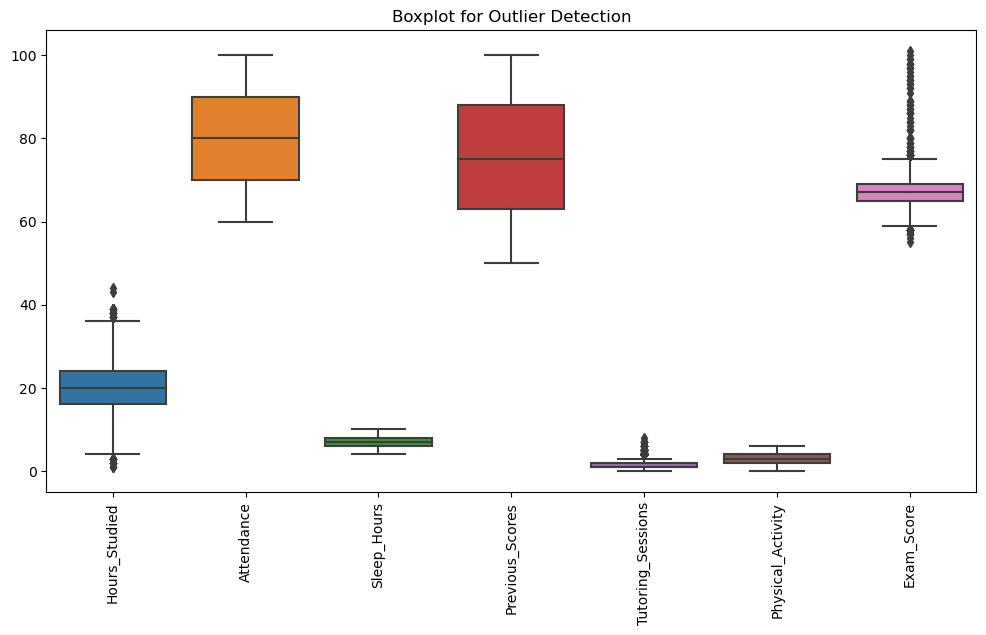

After removing outliers: (6054, 20)


In [26]:
# Boxplot for visual detection
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

# IQR method to remove outliers
def remove_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df = remove_outliers_iqr(df)
print("After removing outliers:", df.shape)


# Visualize correlations

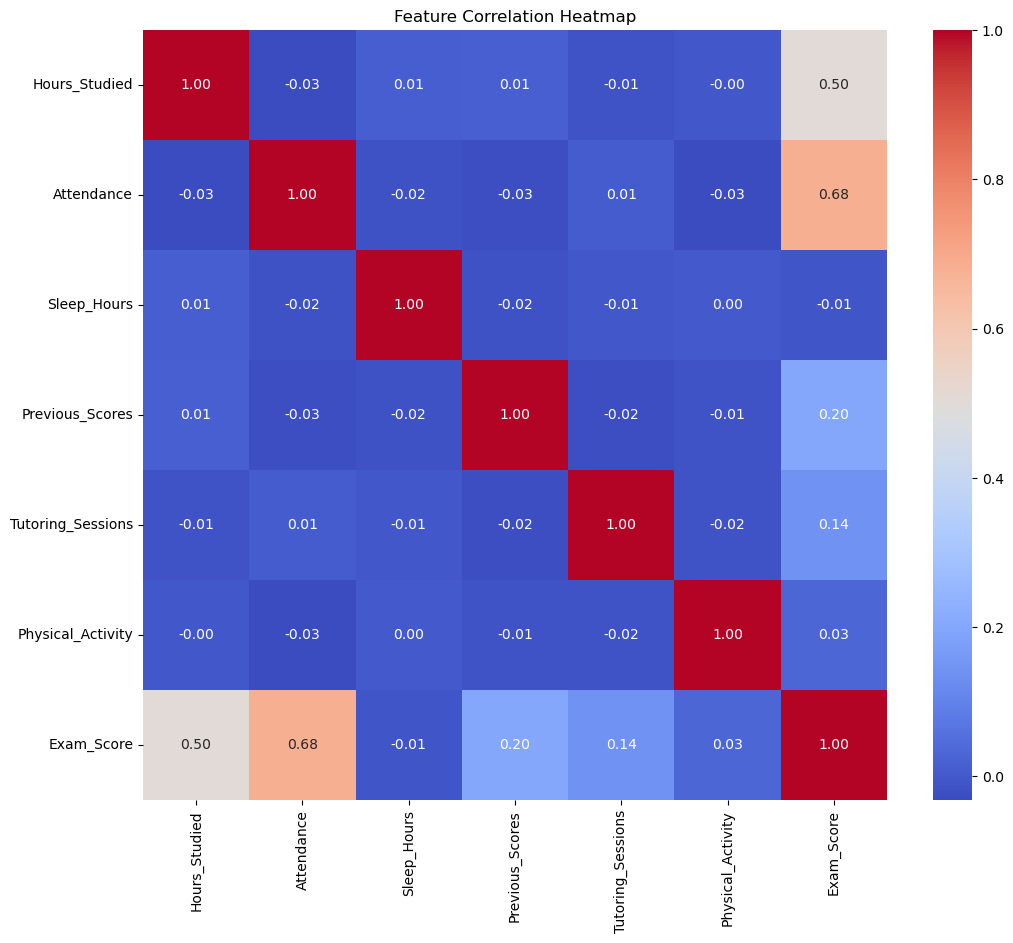

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# Encode categorical columns

In [28]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])


# Define Features and Target

In [29]:
target_column = 'Exam_Score'
X = df.drop(target_column, axis=1)
Y = df[target_column]


# Train-test split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)


# Feature scaling

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train XGBoost Regressor

In [32]:
xgb_model = XGBRegressor(
    n_estimators=300,        # number of trees
    learning_rate=0.1,       # step size
    max_depth=6,             # tree depth
    subsample=0.8,           # use 80% of data per tree
    colsample_bytree=0.8,    # use 80% of features per tree
    random_state=42,
    reg_lambda=1,            # L2 regularization
    reg_alpha=0              # L1 regularization
)
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

# Predictions

In [33]:
y_pred = xgb_model.predict(X_test)

# Model Evaluation

In [34]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

print("\n--- Model Evaluation (XGBoost) ---")
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R² Score:", round(r2, 2))


--- Model Evaluation (XGBoost) ---
Mean Absolute Error (MAE): 0.43
Mean Squared Error (MSE): 0.3
Root Mean Squared Error (RMSE): 0.55
R² Score: 0.97


# Actual vs Predicted Plot


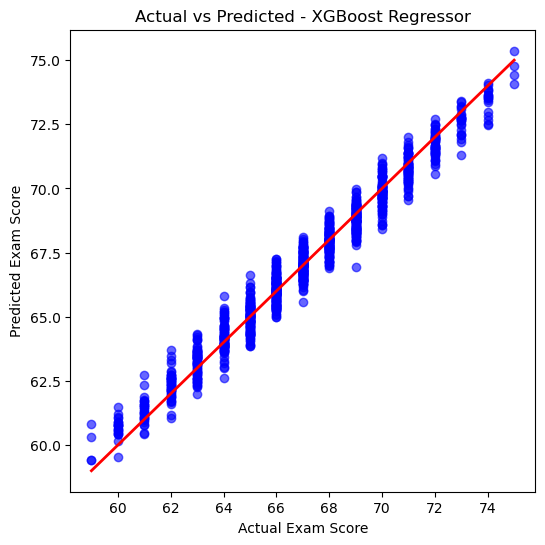

In [35]:

plt.figure(figsize=(6,6))
plt.scatter(Y_test, y_pred, color='blue', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted - XGBoost Regressor")
plt.show()

# Results and Inference



After training and testing the XGBoost Regressor, the model’s performance was evaluated using unseen test data. The evaluation metrics are as follows:

Metric	Value
* Mean Absolute Error (MAE)	      `0.43`
* Mean Squared Error (MSE)	      `0.30`
* Root Mean Squared Error (RMSE)  `0.55`
* R² Score	                      `0.97`

These results indicate that:

The low error values (MAE, MSE, RMSE) confirm that the predicted exam scores are very close to the actual values, reflecting the model’s high accuracy.

The R² score of 0.97 demonstrates that the model is able to explain approximately 97% of the variance in exam scores, indicating an excellent fit and strong predictive capability.

The Actual vs Predicted plot further validates this, showing that most data points lie close to the ideal red line, signifying minimal deviation between true and predicted values.

Overall, the XGBoost Regressor achieved remarkable predictive accuracy and generalization performance. The model effectively captures complex relationships between student-related features and exam performance, making it a reliable tool for forecasting academic outcomes and identifying factors that significantly influence student success.

# Conclusion

The XGBoost Regressor has proven to be a highly effective and robust model for predicting students’ exam performance based on multiple influencing factors. The model’s outstanding accuracy and low error metrics indicate that it can reliably forecast exam outcomes and help identify critical variables that impact academic success. This predictive approach can assist educators and policymakers in recognizing at-risk students early, providing personalized support, and enhancing overall learning outcomes. Future improvements may include testing additional algorithms, performing feature importance analysis, and integrating real-time data to further refine the model’s predictive capability and practical applicability in educational settings.